# Project: Investigate medical appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset consists of data collected through medical appointments. We have several categorical columns that makes up a majority of the data. Timestamps are also included that presents on which day the appointment have been made versus when it is scheduled. 

This could be insteresting to analyze if the season may disclose any thoughs regarding if the patient shows up or not, along with the mean time between booking. 

One hypothesis may be that younger skips appointments more than elderly in seasons where the weather is generally better. Furthermore, there may be more than one appointment per PatientId, which adds another dimension to the analysis etc..

The columns present the following information (taken from kaggle):
### 01 - PatientId
Identification of a patient
### 02 - AppointmentID
Identification of each appointment
### 03 - Gender
Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
### 04 - DataMarcacaoConsulta (In this case, ScheduledDay)
The day of the actuall appointment, when they have to visit the doctor.
### 05 - DataAgendamento (In this case, AppointmentDay)
The day someone called or registered the appointment, this is before appointment of course.
### 06 - Age
How old is the patient.
### 07 - Neighbourhood
Where the appointment takes place.
### 08 - Scholarship
True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
### 09 - Hipertension
True or False
### 10 - Diabetes
True or False
### Alcoholism
True or False
### Handcap
True or False
### SMS_received
1 or more messages sent to the patient.
### No-show
True or False. (If "No", Then the patient showed up) (Categorical "No" and "Yes")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sn

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


#### Load data

In [2]:
df = pd.read_csv("data/{}".format(os.listdir("Data")[0]))
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### There exists one or more appointments for the same patient. We have 62299 unique patientId's. 


In [3]:
print(str(len(df.AppointmentID)) + " number of AppointmentID")
print(str(len(set(df.AppointmentID))) + " number of unique AppointmentID")
print(str(len((df.PatientId))) + " number of PatientId")
print(str(len(set(df.PatientId))) + " number of unique PatientId")

110527 number of AppointmentID
110527 number of unique AppointmentID
110527 number of PatientId
62299 number of unique PatientId


#### We see different datatypes for each column. No need to clean for null values. 


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### The PatientId and Appointment Id should be categorical Strings instead of integers and floats.


In [5]:
df[["PatientId","AppointmentID"]] = df[["PatientId","AppointmentID"]].astype(str)

#### Analysing the columns and values, we notice deviations in some of the columns. 
Minimum Age is negative in this case, and max age is 115 (which could be reasonable though).

In [6]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


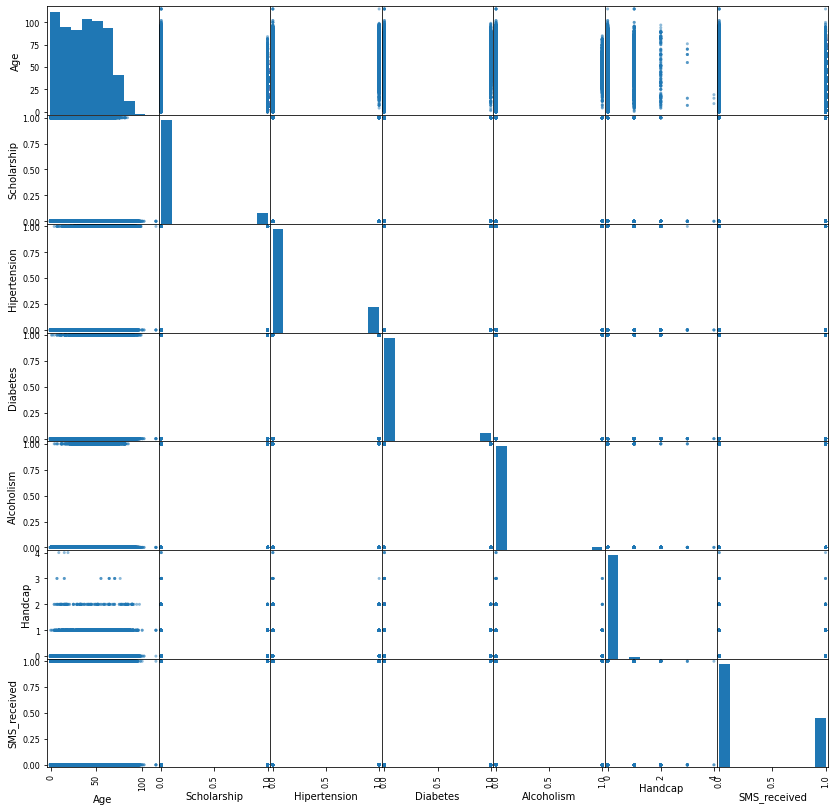

In [7]:
pd.plotting.scatter_matrix(df[["Age","Scholarship","Hipertension","Diabetes","Alcoholism","Handcap","SMS_received"]],figsize = (14,14));

#### We can see that "Handcap" contains not only 0 (False) and 1 (True), but also 2,3,4. The spelling is also wrong.

{0, 1, 2, 3, 4}


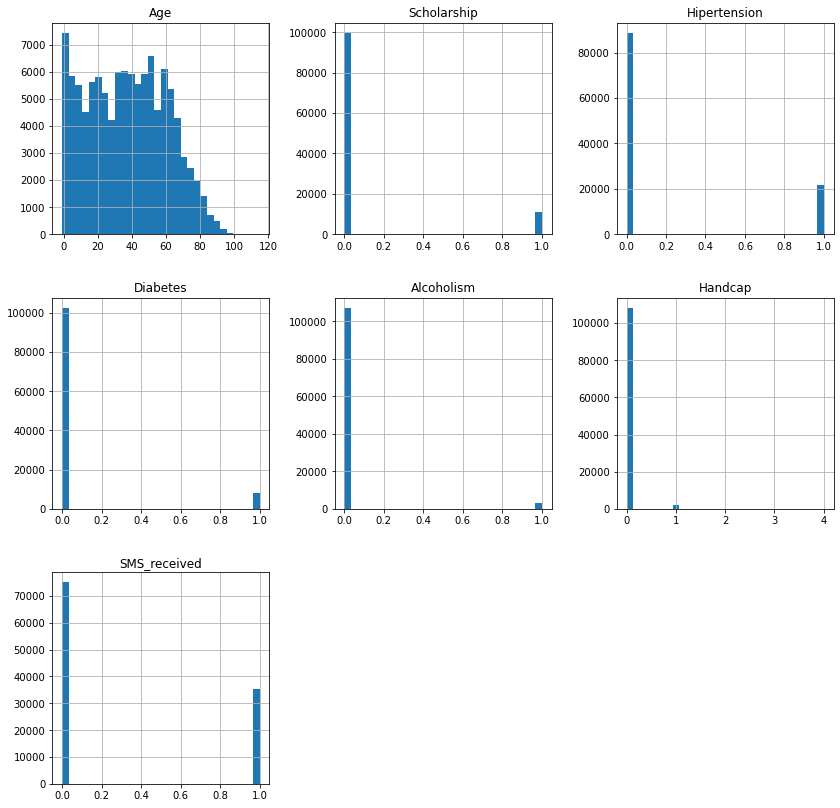

In [8]:
print(set(df["Handcap"]))
df.hist(figsize = (14,14), bins = 30);

### Data Cleaning
Here, we apply some cleaning of the findings that we found in the previous chapter

In [9]:
# Make datetime
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"])
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"])

# Remove the redundant time
df["AppointmentDay_date"] =  pd.to_datetime(df["AppointmentDay"].dt.strftime('%Y-%m-%d'))
df["ScheduledDay_date"] =  pd.to_datetime(df["ScheduledDay"].dt.strftime('%Y-%m-%d'))

#### Weird, some of the scheduled dates are after the appointent dates..


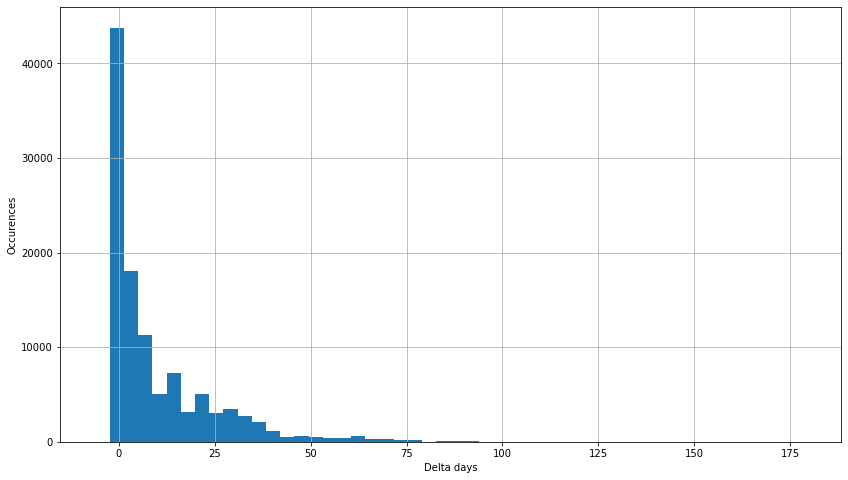

In [10]:
df["delta_booking"] = df["AppointmentDay_date"] - df["ScheduledDay_date"]
df["delta_booking"].astype('timedelta64[D]').astype(int).hist(bins = 50, figsize = (14,8));
plt.ylabel("Occurences");
plt.xlabel("Delta days");

#### Remove if the SheduledDay date is after the appointmentDay date


In [11]:
df = df[df["delta_booking"].astype('timedelta64[D]').astype(int) > 0]
df["delta_booking"] = df["delta_booking"].astype('timedelta64[D]').astype(int)

#### Add time of the day

In [12]:
df["TimeOfDay"] = df["ScheduledDay"].dt.hour

#### Fix spelling on "handcap" to "handicap"

> Change "Handcap" to "Handicap". Also, the handcap doesn't give me any information when its categorized 2,3 or 4., therefore we remove them


In [13]:
df.columns = [i.replace("Handcap","Handicap") for i in df.columns.to_list()]

print("{} dropped rows".format(len(df[df["Handicap"] >=2])))
df = df[df["Handicap"] <2]

122 dropped rows


#### Here i want to remove ages below 0, for obvious reasons. I could also remove ages > 100, or similar. But i will let them be, as the age still is feasible

In [14]:
df = df[df["Age"] >= 0]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71837 entries, 5 to 110526
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   PatientId            71837 non-null  object             
 1   AppointmentID        71837 non-null  object             
 2   Gender               71837 non-null  object             
 3   ScheduledDay         71837 non-null  datetime64[ns, UTC]
 4   AppointmentDay       71837 non-null  datetime64[ns, UTC]
 5   Age                  71837 non-null  int64              
 6   Neighbourhood        71837 non-null  object             
 7   Scholarship          71837 non-null  int64              
 8   Hipertension         71837 non-null  int64              
 9   Diabetes             71837 non-null  int64              
 10  Alcoholism           71837 non-null  int64              
 11  Handicap             71837 non-null  int64              
 12  SMS_received     

### I want to make the Gender column to a numerical column, same with the No-show for simplicity
> **Gender** Male = 1, Female = 0

> **No-show** Yes = 1, No = 0

In [16]:
df["Gender_num"] = df["Gender"].replace("F","0").replace("M","1").astype(int)
df["No-show_num"] = df["No-show"].replace("No","0").replace("Yes","1").astype(int)

### To get more insights on correlation between parameters, a correlation matrix is calculated

#### https://datatofish.com/correlation-matrix-pandas/ - Guide for corr matrix


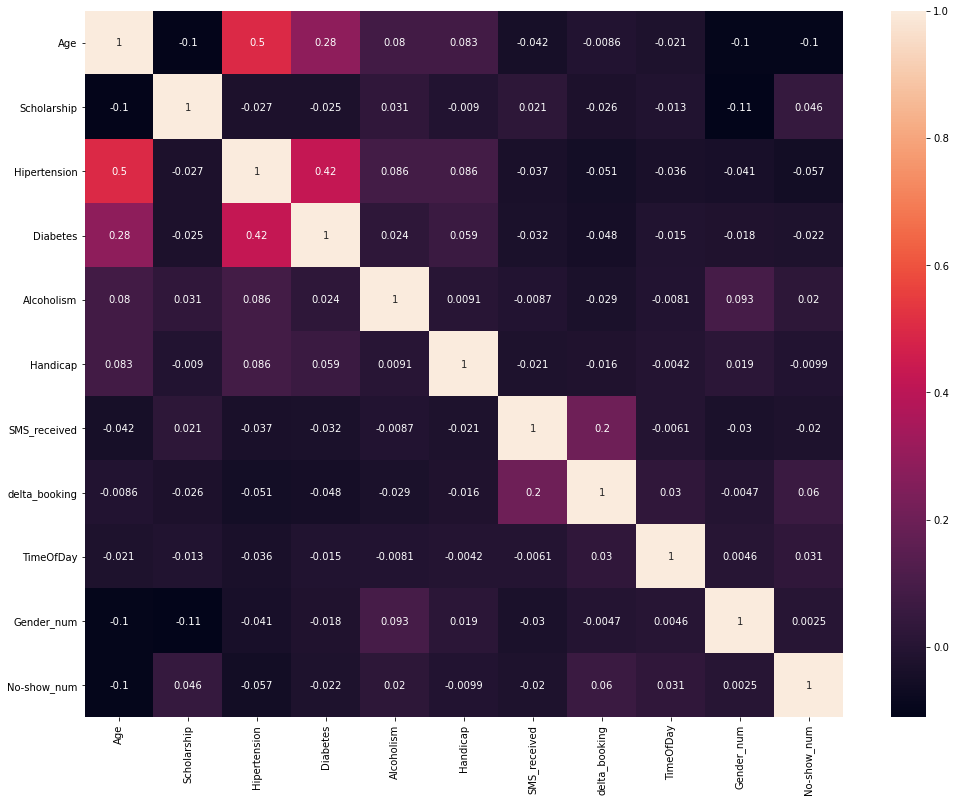

In [17]:
plt.figure(figsize = (17,13))
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

<a id='eda'></a>
## Exploratory Data Analysis


###  Do the time infuence the No-Show? Time between when the appointment was scheduled to when it occured. Also, time of the day.

#### Plot the distribution of the time between booking and appointment

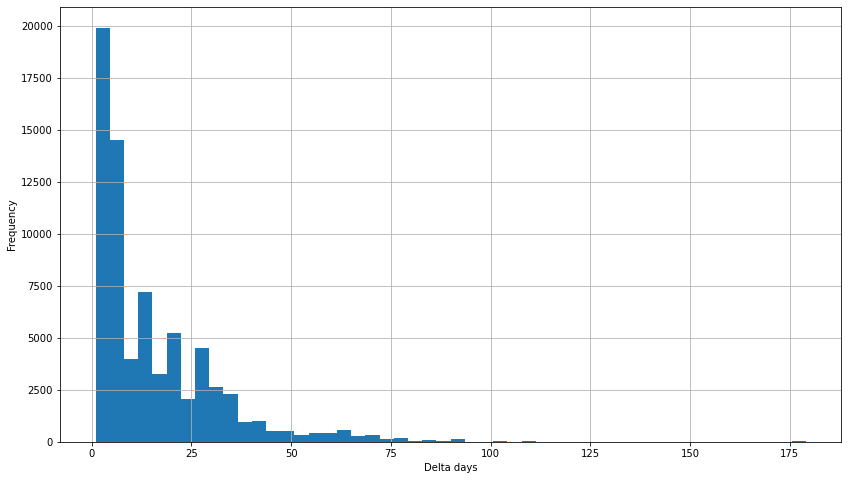

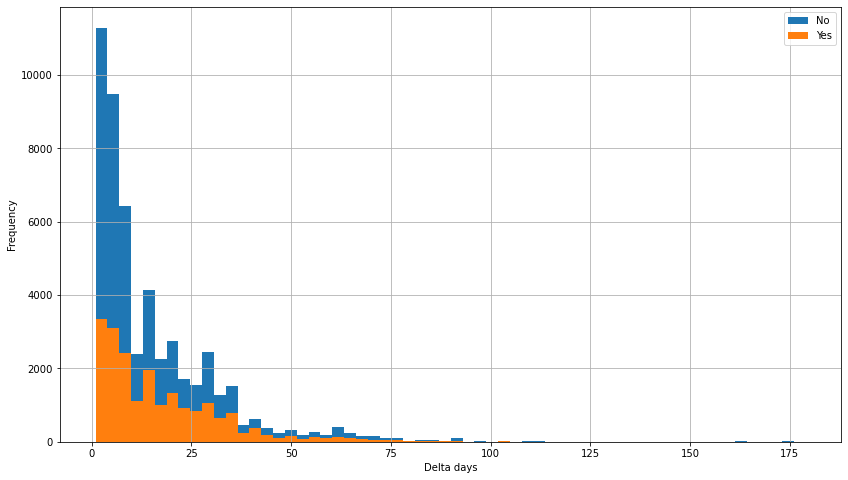

In [18]:
no_show_no = df["No-show"] == "No"
no_show_yes = df["No-show"] == "Yes"
df["delta_booking"].hist(bins = 50, figsize = (14,8));
plt.xlabel("Delta days")
plt.ylabel("Frequency")

plt.figure(figsize = (14,8))
plt.hist(df[no_show_no]["delta_booking"], bins = 60);
plt.hist(df[no_show_yes]["delta_booking"], bins = 60);
plt.legend(["No","Yes"]);
plt.xlabel("Delta days")
plt.ylabel("Frequency")
plt.grid()

#### Sum the number of days for each category (not taking account for same person with several bookings)


In [19]:
no_days = df.groupby("No-show").sum("delta_booking_int")["delta_booking"]["No"]
yes_days = df.groupby("No-show").sum("delta_booking_int")["delta_booking"]["Yes"]
print("Number of days for No-delta (Came to the appointment): {}".format(no_days))
print("Number of days for Yes-delta (Came to the appointment): {}".format(yes_days))


Number of days for No-delta (Came to the appointment): 771220
Number of days for Yes-delta (Came to the appointment): 352688


#### Sum the number of yes & no

In [20]:
no_show_no_num = len(df[no_show_no])
no_show_yes_num = len(df[no_show_yes])
print("Number of No (Came to the appointment): {}".format(no_show_no_num))
print("Number of Yes (Did not come to the appointment): {}".format(no_show_yes_num))

Number of No (Came to the appointment): 51352
Number of Yes (Did not come to the appointment): 20485


#### Calculate the mean days and visualize the findings

> **Insight**: We notice that the mean days between showing up vs not showing up is longer for the yes vs no. This implies that the further in the future you schedule an appointment, the more likely you are to not come to the appointment. 

#### Helper function

> To help the visualization. 


In [21]:
def visual_bar(DF,groupby_list, y_list, title, ylab, agg_var, agg):
    if agg == "sum":
        DF.groupby(groupby_list).sum(agg_var).plot.bar(y = y_list,figsize = (13,6));
    if agg == "mean":
        DF.groupby(groupby_list).mean(agg_var).plot.bar(y = y_list,figsize = (13,6));
    plt.ylabel(ylab)
    plt.grid()
    plt.title(title);


Mean days of when people came to appointment (No): 15.018305031936439
Mean days of when people did not come to appointment (Yes): 17.216890407615328


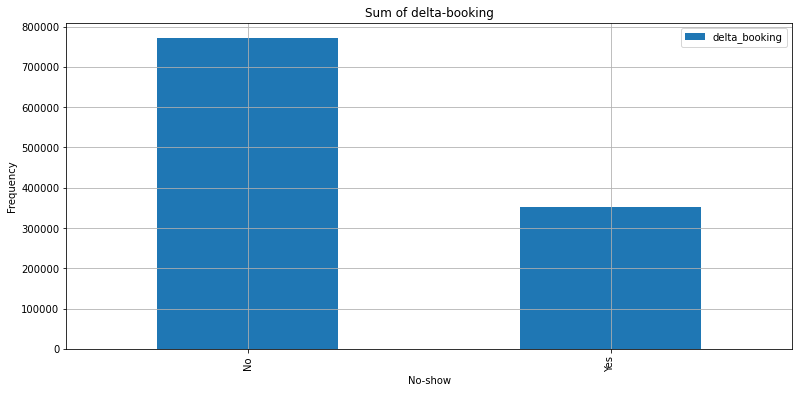

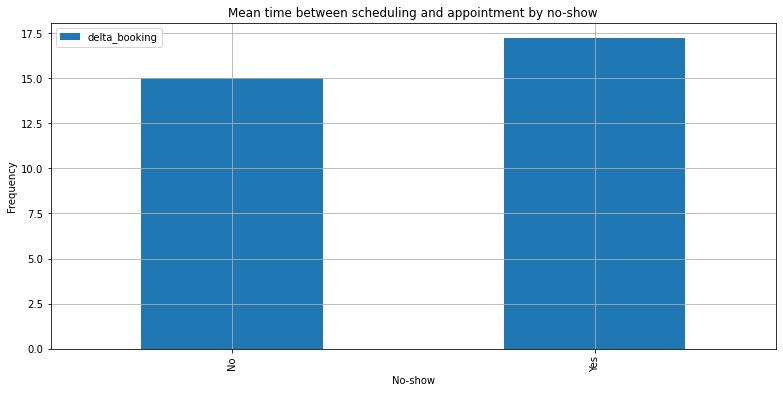

In [22]:
print("Mean days of when people came to appointment (No): {}".format(no_days / no_show_no_num))
print("Mean days of when people did not come to appointment (Yes): {}".format(yes_days / no_show_yes_num))

visual_bar(df,["No-show"], ["delta_booking"], "Sum of delta-booking", "Frequency", "delta_booking", agg = "sum")
visual_bar(df,["No-show"], ["delta_booking"], "Mean time between scheduling and appointment by no-show", "Frequency", "delta_booking", agg = "mean")

#### For curiosity, how is the mean age distributed between the no and yes?
> We see that there is a higher mean age in the No-show category. Are there a connection between that beeing older makes you not schedule appointments further in the future, and as a consequence you actually end up going to the appointment..?

> By visualizing the mean time of day for each yes and no show, there is a close to no difference in when the appointment is.

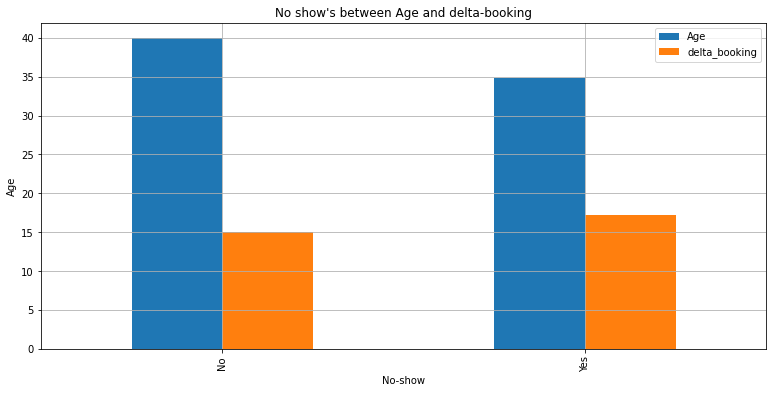

In [23]:
visual_bar(df,groupby_list = ["No-show"], y_list = ["Age","delta_booking"], title = "No show's between Age and delta-booking", ylab = "Age", agg_var = "delta_booking", agg = "mean")

No-show
No     11.012833
Yes    11.236466
Name: TimeOfDay, dtype: float64


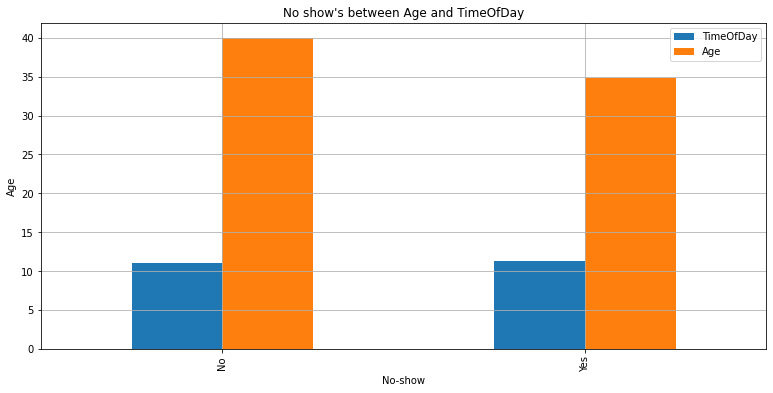

In [24]:
print(df.groupby(["No-show"]).mean("TimeOfDay")["TimeOfDay"])
visual_bar(df,groupby_list = ["No-show"], y_list = ["TimeOfDay","Age"], title = "No show's between Age and TimeOfDay", ylab = "Age", agg_var = "TimeOfDay", agg = "mean")

### Do the gender influence the no-show category? Diabetes and Hipertension for example in relation to gender (as we saw strong correlation between those two)?

> **NOTE** There are more females than males that have booked appointments

> Grouping by no-show and gender, by calculating the mean of diabetes and hipertension gives us indications of the influence of genders together with the other categories. Here we see that, generally, there are a larger portion of people that are having conditions that actually show up at the appointments. It is harder to observe the influence of gender.

In [25]:
df.Gender.value_counts()

F    48001
M    23836
Name: Gender, dtype: int64

#### By normalizing the gender count with the no-show sum we can compare the genders.

In [26]:
df.Gender.value_counts() / df.groupby("Gender").sum("No-show")["No-show_num"]

F    3.516814
M    3.486834
dtype: float64

#### Looking into two highly correlated conditions together with gender may bring clarity if this influences the no-show.

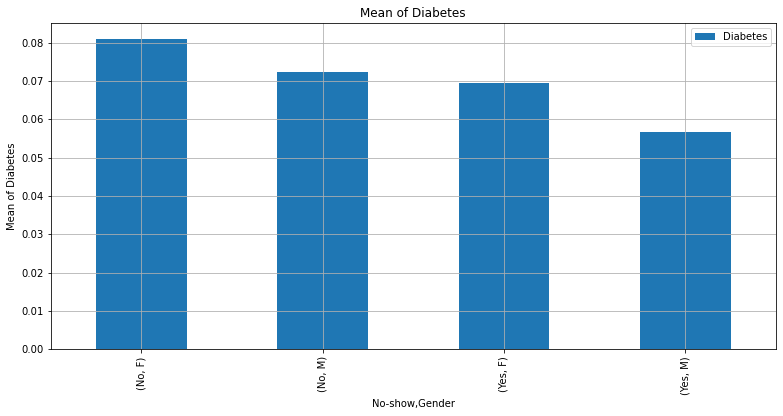

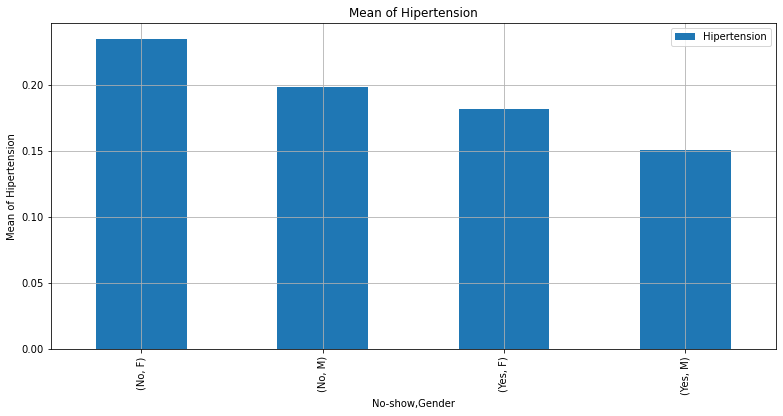

In [27]:
visual_bar(df,["No-show","Gender"], ["Diabetes"], "Mean of Diabetes", "Mean of Diabetes", np.nan, "mean")
visual_bar(df,["No-show","Gender"], ["Hipertension"], "Mean of Hipertension", "Mean of Hipertension", np.nan, "mean")

#### By setting a condition of diabetes and hipertension and grouping by gender and the condition, we can see that the diabetes and hipertension is dependent on age. So the higher the age, the more likely that a person have diabetes and hipertension. We can't draw any major conclusions regarding the gender in this case.

In [28]:
df["Diabetes_Hipertension"] = df["Diabetes"] * df["Hipertension"]
df.groupby(["Gender","Diabetes_Hipertension"]).mean()

Age  Scholarship  Hipertension  Diabetes  \
Gender Diabetes_Hipertension                                                   
F      0                      38.489749     0.118086      0.165864  0.013482   
       1                      63.316278     0.078350      1.000000  1.000000   
M      0                      33.675976     0.048464      0.140081  0.016553   
       1                      63.366345     0.020129      1.000000  1.000000   

                              Alcoholism  Handicap  SMS_received  \
Gender Diabetes_Hipertension                                       
F      0                        0.014708  0.012881      0.508268   
       1                        0.018228  0.042853      0.437800   
M      0                        0.043640  0.017704      0.474020   
       1                        0.090177  0.058776      0.441224   

                              delta_booking  TimeOfDay  Gender_num  \
Gender Diabetes_Hipertension                                         
F      0                          15.903552  11.080537         0.0   
       1                          12.769108  10.858650         0.0   
M      0                          15.671240  11.115163         1.0   
       1                          13.081320  10.781804         1.0   

                              No-show_num  
Gender Diabetes_Hipertension               
F      0                         0.286937  
       1                         0.247202  
M      0                         0.289944  
       1                         0.229469

<a id='conclusions'></a>
## Conclusions

> Analysing the delta-time implicates that the farther in the future you schedule an appointment, the more likely you are to not come to the appointment, in average. Only the category "No-show" dependent on "Yes" and "No" have been looked into, no further correlation have been investigated.

> The gender shows no large impact on the outcome for the "No-show" category. Although, the medical conditions "Diabetes" AND "Hipertension" are both present for women in higher ages, while this condition also influences if they show up or not at the appointment.

### Limitations

> To be able to draw conclusions regarding the delta-time and how it correlates to showing up or not, further analysis is needed. We would have to look into if the delta time is largely correlated to a certain parameter or not. E.g., would a large proportion of people with the category "Alcoholic" increase the average delta-time, in combination that a larger proportion of these people are adults.

> A further analysis of the gender influence to the no-show could be to look into the categories. E.g., are gender combined with any other condition correlated with not showing up.